<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#importing-librarys-and-data" data-toc-modified-id="importing-librarys-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>importing librarys and data</a></span></li><li><span><a href="#Visualizing-a-time-series" data-toc-modified-id="Visualizing-a-time-series-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualizing a time series</a></span></li><li><span><a href="#Patterns-in-a-time-series" data-toc-modified-id="Patterns-in-a-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Patterns in a time series</a></span></li><li><span><a href="#decompose-a-time-series-into-its-components" data-toc-modified-id="decompose-a-time-series-into-its-components-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>decompose a time series into its components</a></span></li></ul></div>

# importing librarys and data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from dateutil.parser import parse 
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [2]:
# Import as Dataframe
# parse makes column to datetime datatype
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [6]:
# panel data
# dataset source: https://github.com/rouseguy
df1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df1 = df1.loc[df1.market=='MUMBAI', :]
df1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 6654 to 6799
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    146 non-null    object
 1   month     146 non-null    object
 2   year      146 non-null    int64 
 3   quantity  146 non-null    int64 
 4   priceMin  146 non-null    int64 
 5   priceMax  146 non-null    int64 
 6   priceMod  146 non-null    int64 
 7   state     146 non-null    object
 8   city      146 non-null    object
 9   date      146 non-null    object
dtypes: int64(5), object(5)
memory usage: 12.5+ KB


# Visualizing a time series

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


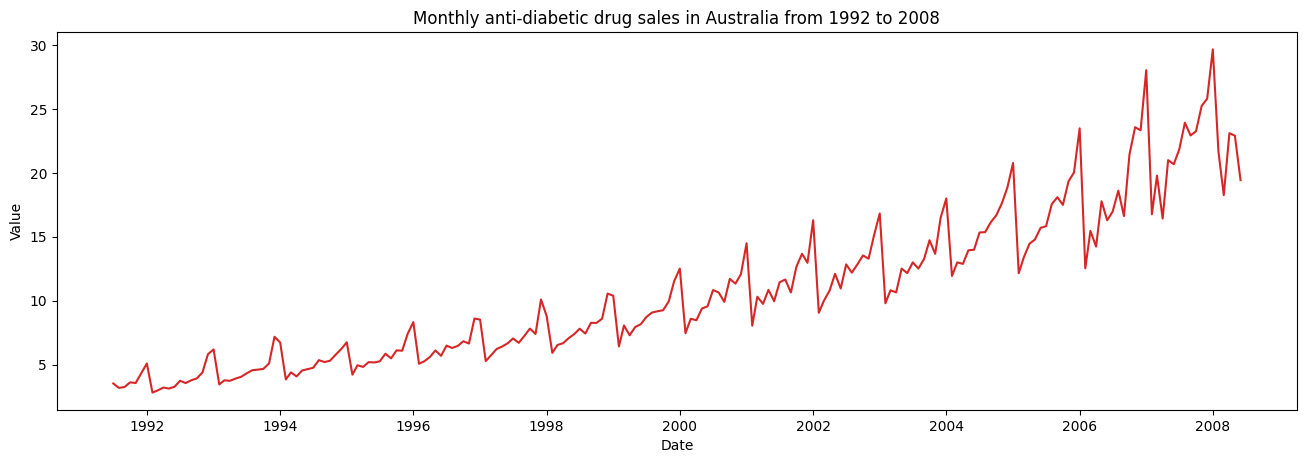

In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008')

In [25]:
df = pd.read_csv('Datafiles/AirPassengers.csv',parse_dates=['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


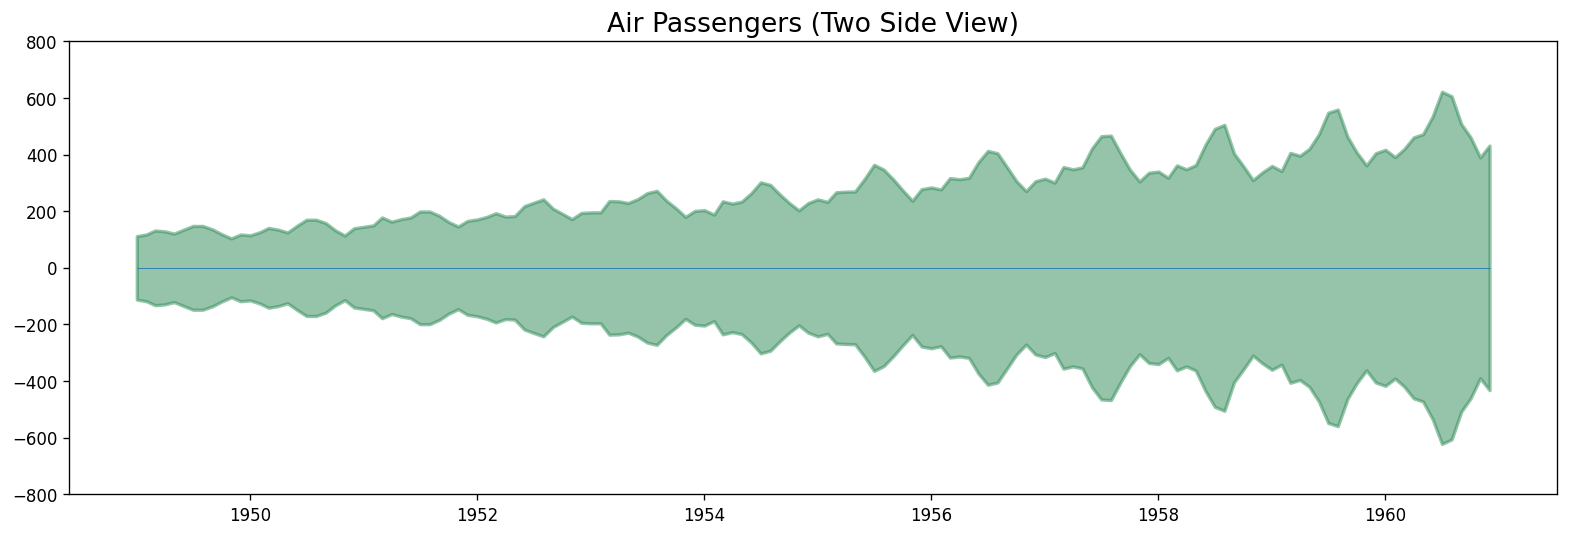

In [26]:
x = df['Month'].values
y1 = df['#Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

##### Seasonal Plot of a Time Series

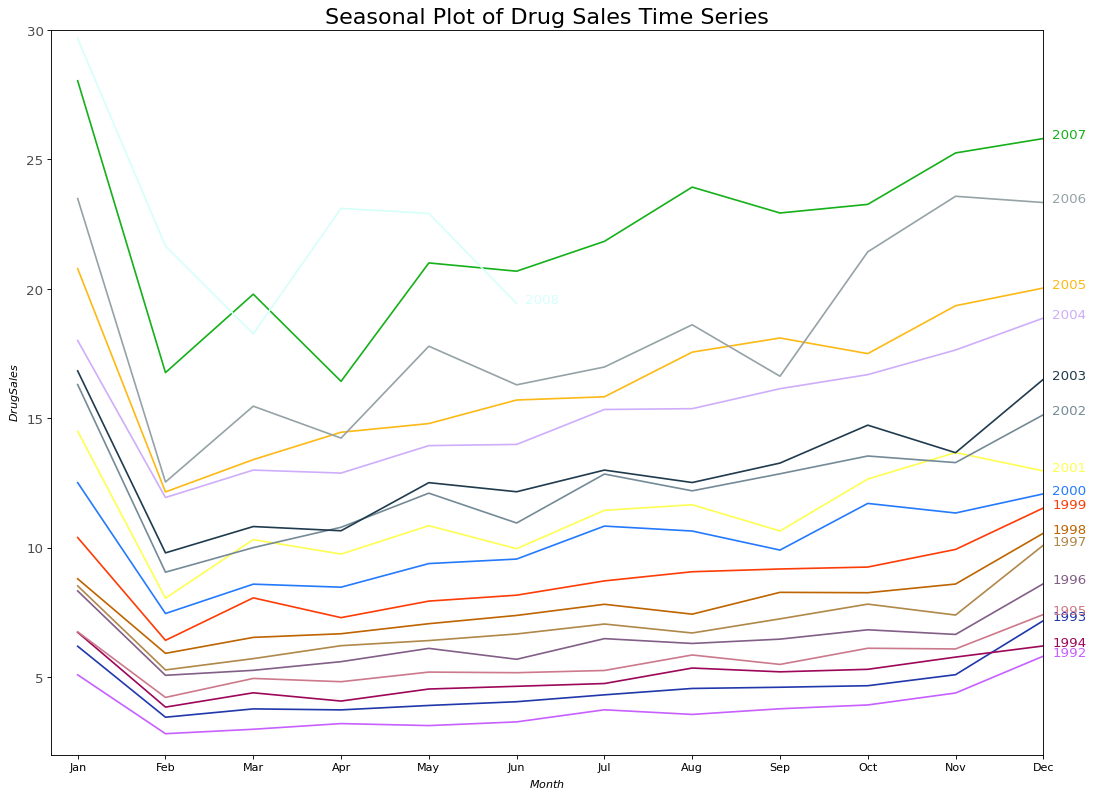

In [27]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

##### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

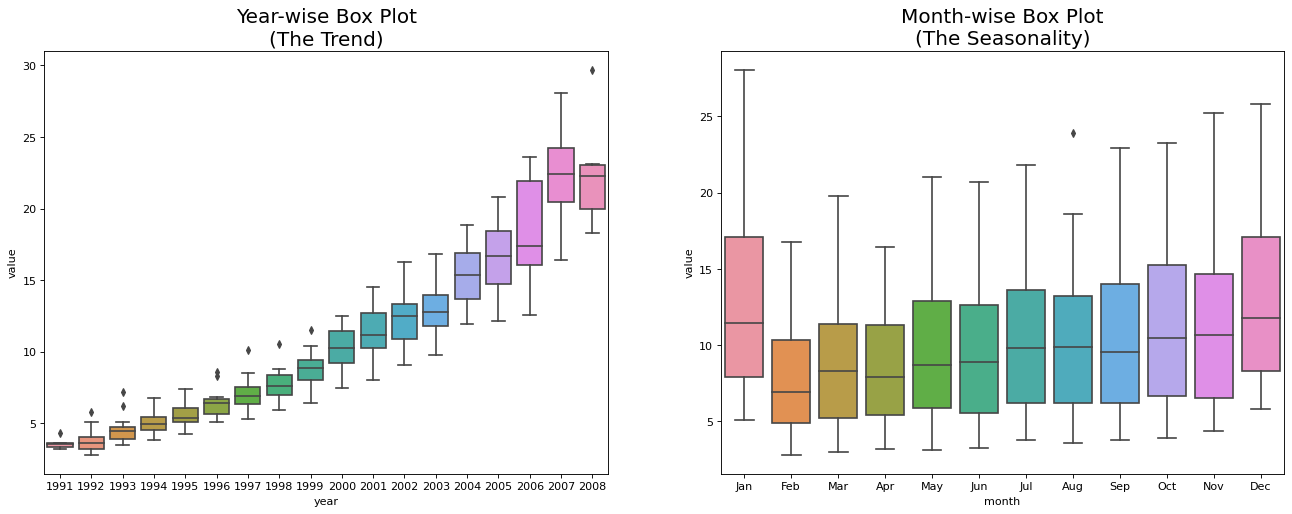

In [28]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Patterns in a time series

<AxesSubplot: title={'center': 'Trend and Seasonality'}, xlabel='date'>

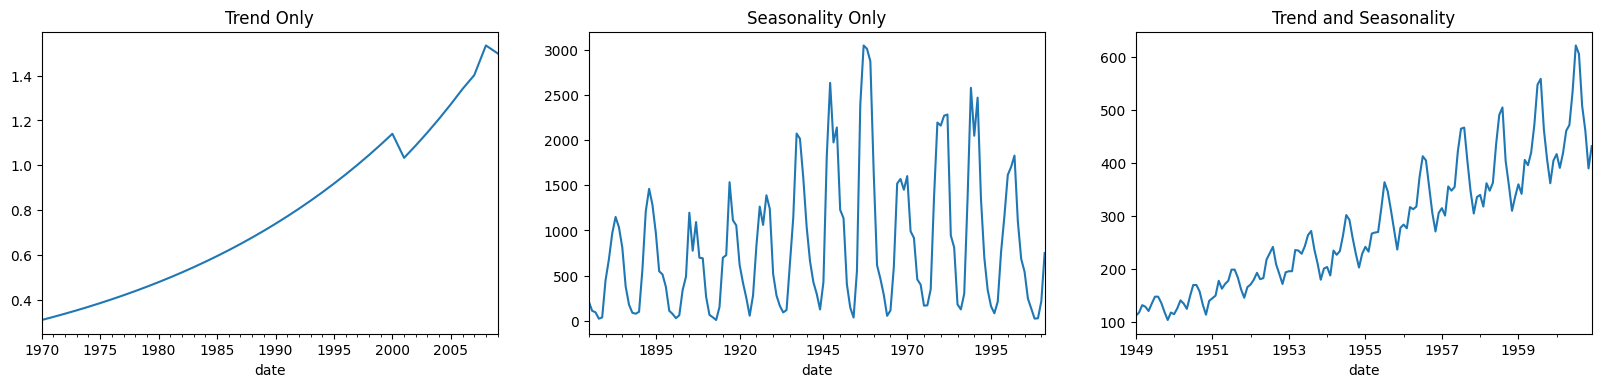

In [29]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', 
            parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv',
            parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv',
            parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

# decompose a time series into its components

TypeError: DecomposeResult.plot() got an unexpected keyword argument 'ax'

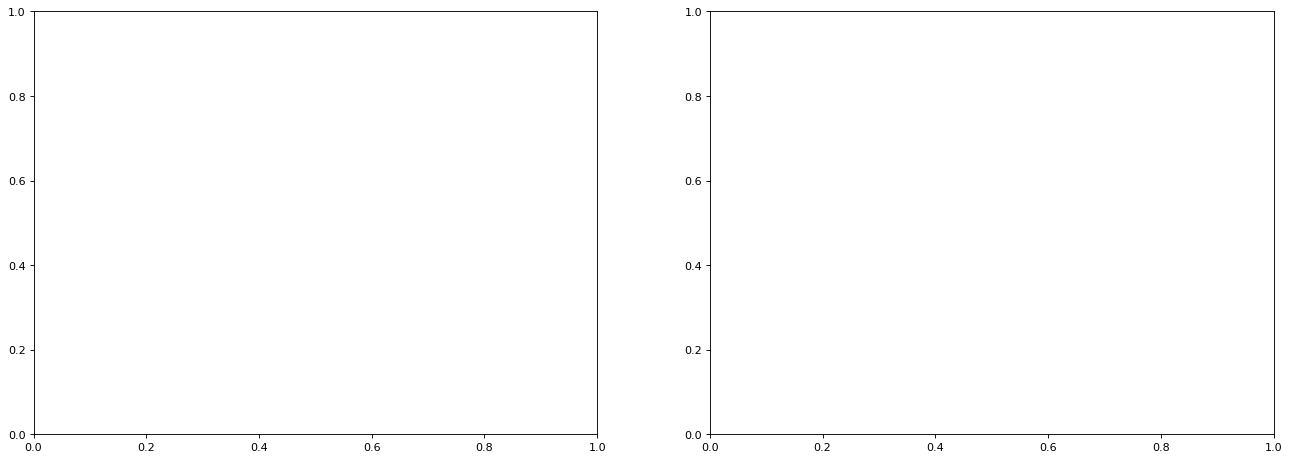

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)


#plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot(ax=axes[0]).suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot(ax=axes[1]).suptitle('Additive Decompose', fontsize=15)
plt.show()

TypeError: DecomposeResult.plot() got an unexpected keyword argument 'ax'

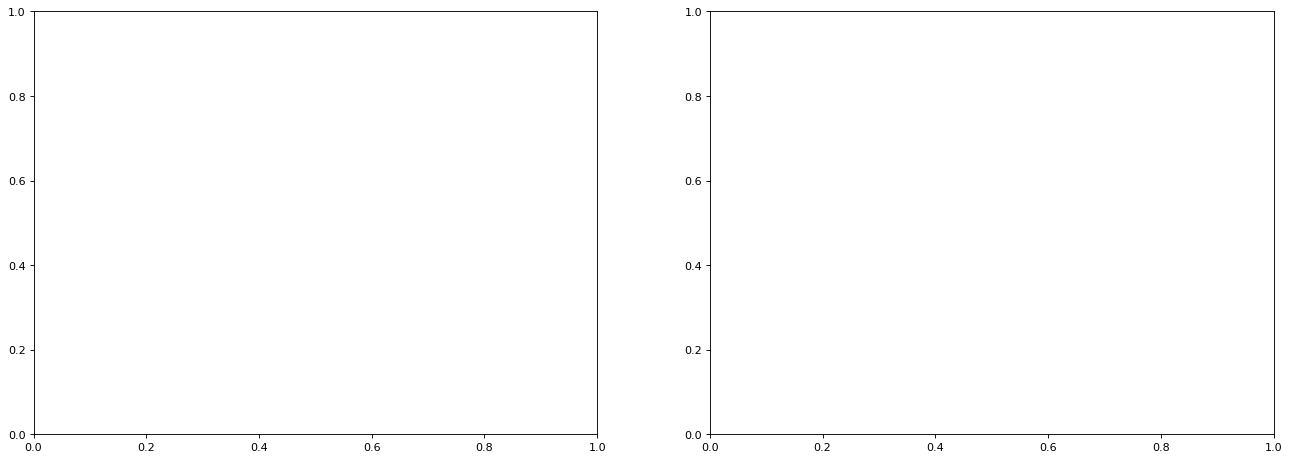

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)

#plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot(ax=axes[0])
result_add.plot(ax=axes[1])
axes[0].set_title('Multiplicative Decompose', fontsize=18); 
axes[1].set_title('Additive Decompose', fontsize=18)
plt.show()

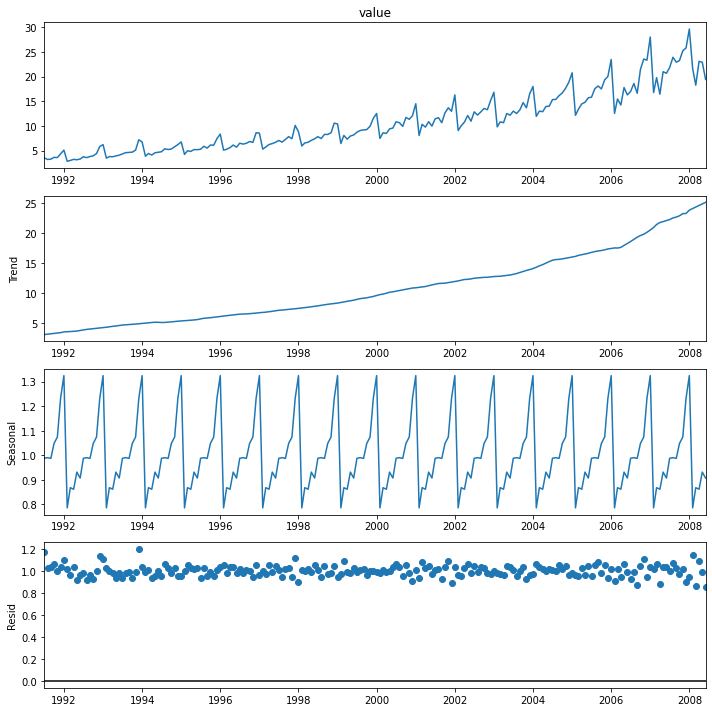

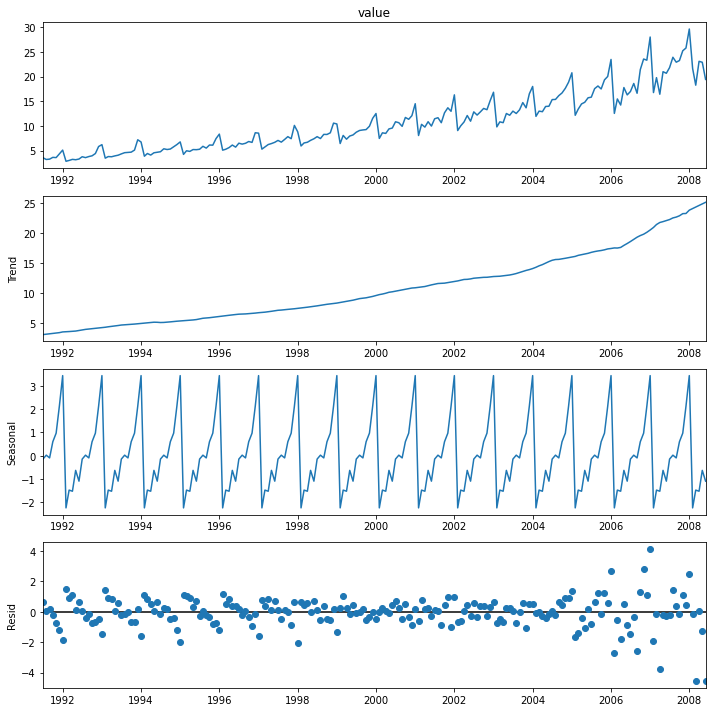

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
#result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
result_mul = seasonal_decompose(df.value, model='multiplicative', extrapolate_trend='freq')
# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot() #.suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot() #.suptitle('Additive Decompose', fontsize=22)
plt.show()

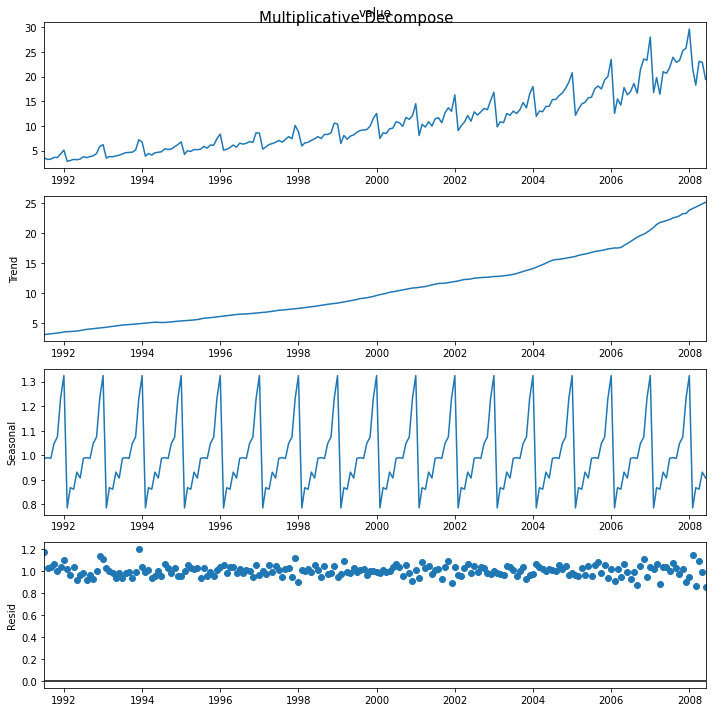

In [36]:

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
plt.show()

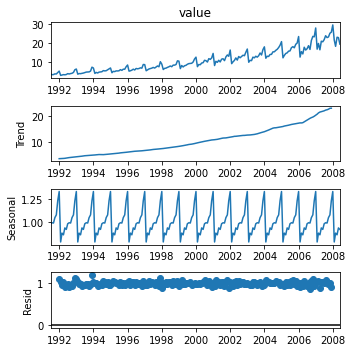

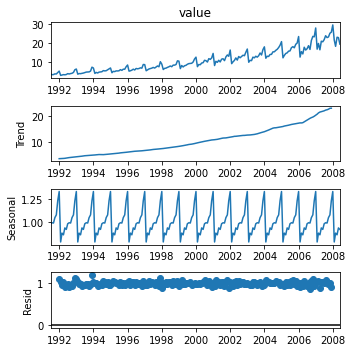

In [63]:
y = df.value
result_mul = seasonal_decompose(y, model='multiplicative'decompose a time series into its components)
#fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
#plt.subplot(4, 1, 1)
#plt.plot(x,y)
#resplot = 
result_mul.plot()
#resplot.plot(T)
#result_mul.plot(ax=ax2)
#result_mul.seasonal.plot(ax=ax3)

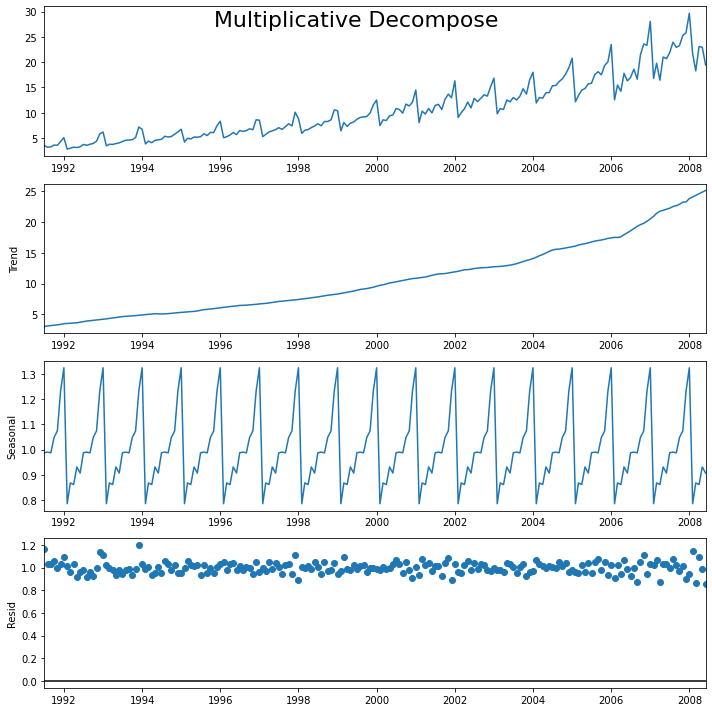

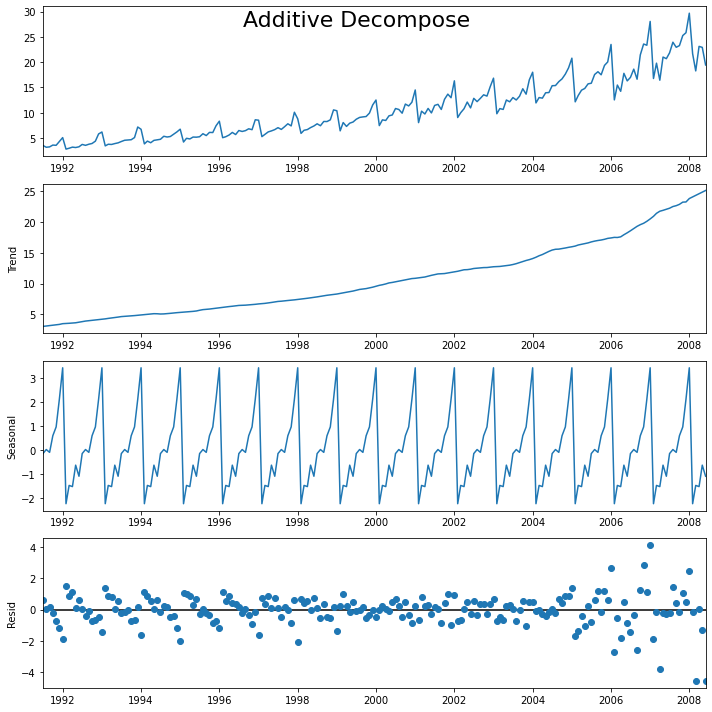

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df, model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df, model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

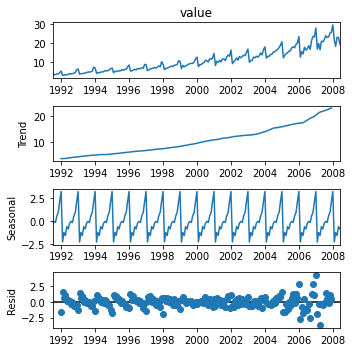

In [65]:
data = y.asfreq('MS')
decompose_data = seasonal_decompose(data, model="additive")
decompose_data.plot()
plt.show()

In [66]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


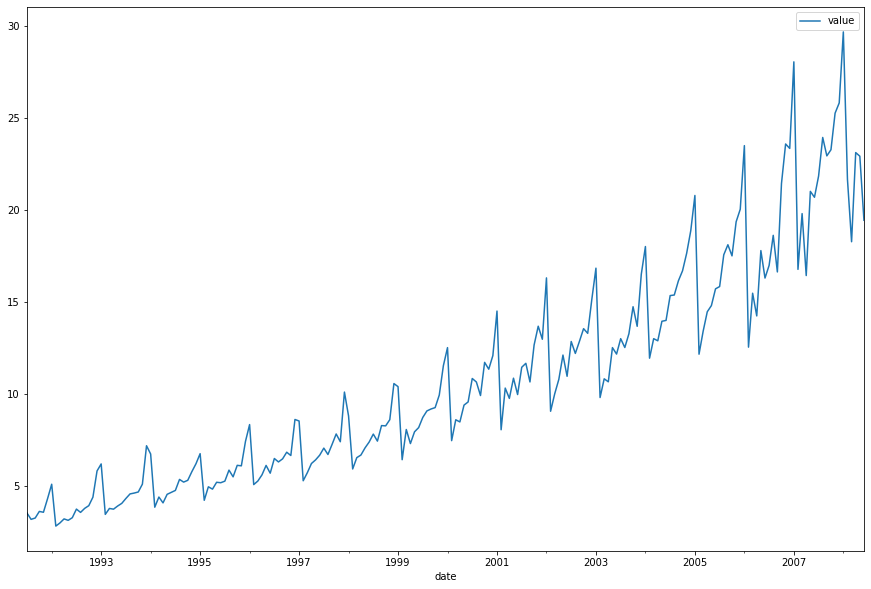

In [68]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
df.plot()
plt.show()

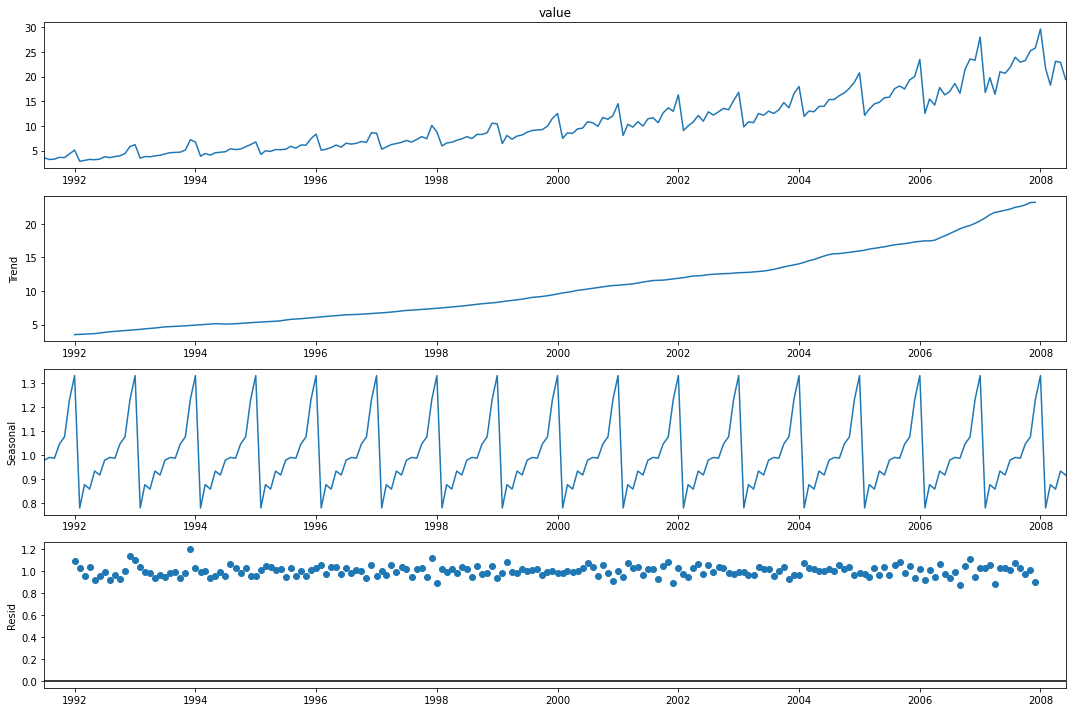

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = data.asfreq('MS')
decompose_data = seasonal_decompose(data, model="multiplicative")
decompose_data.plot()
plt.show()

TypeError: 'Text' object is not callable

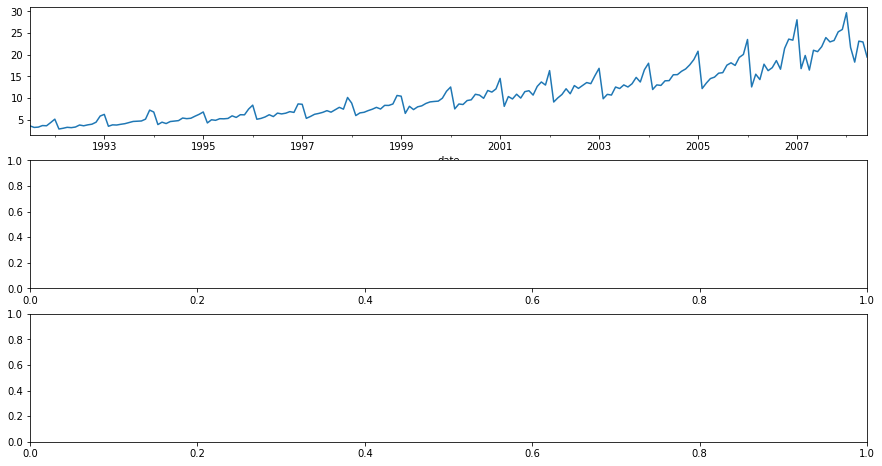

In [76]:
level = decompose_data.observed

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))

level.plot(ax=ax1).title("INCOME")
level.plot(ax=ax2)
level.plot(ax=ax3)
plt.title("INCOME")
#result_mul.seasonal.plot(ax=ax3)
#level.plot()

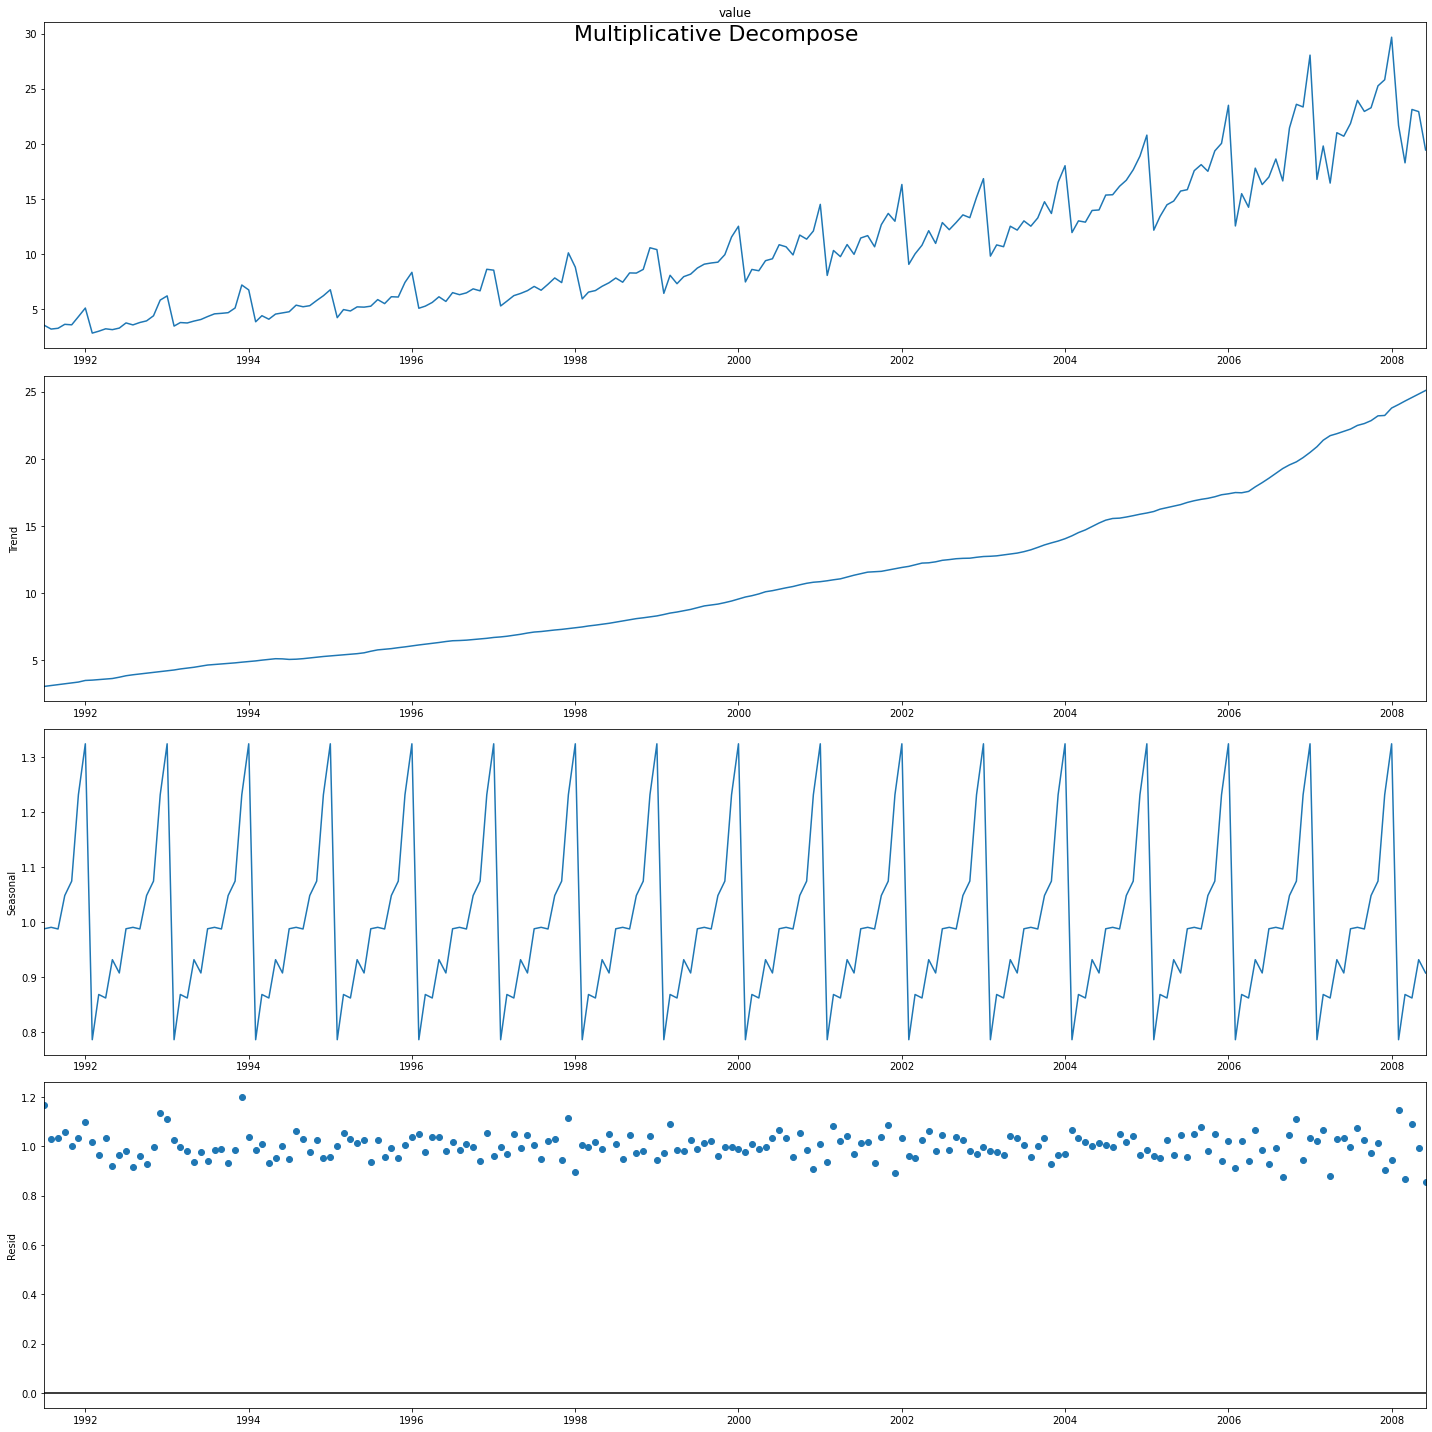

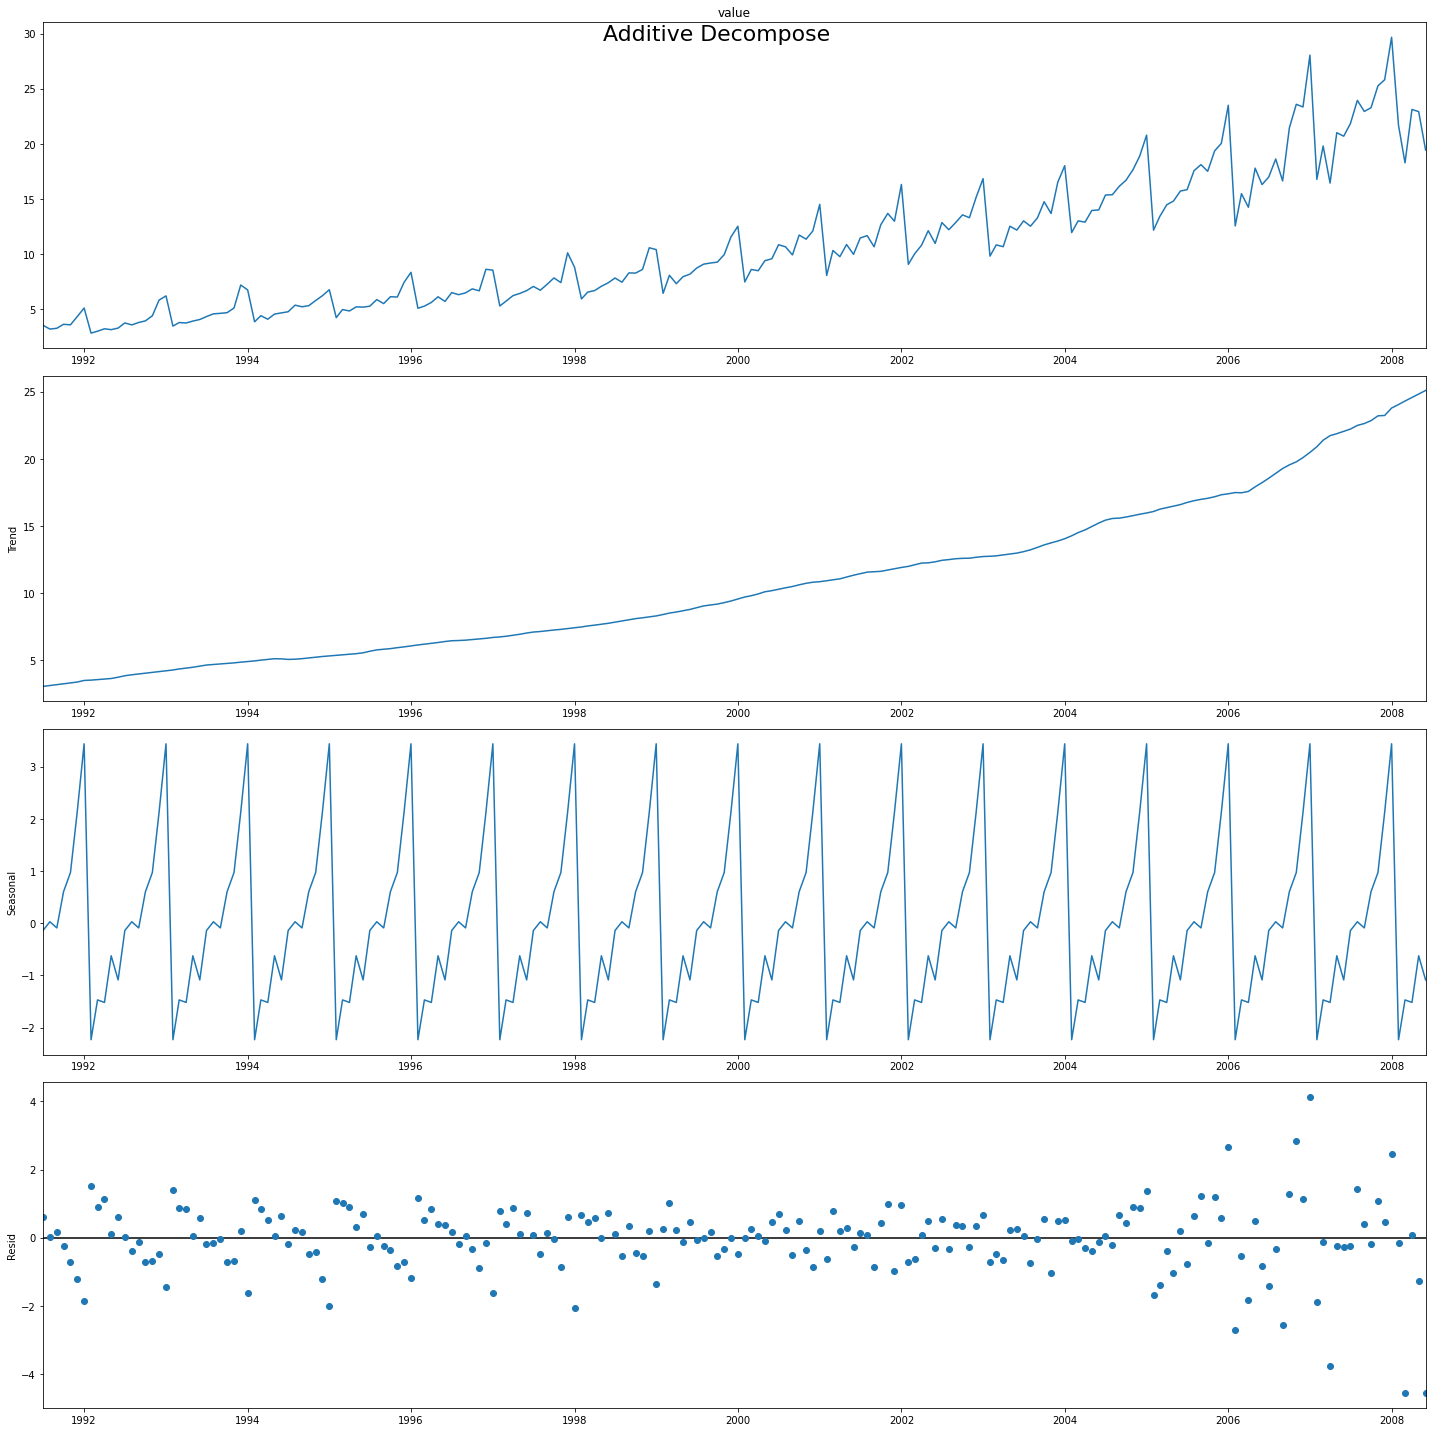

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (20,20)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

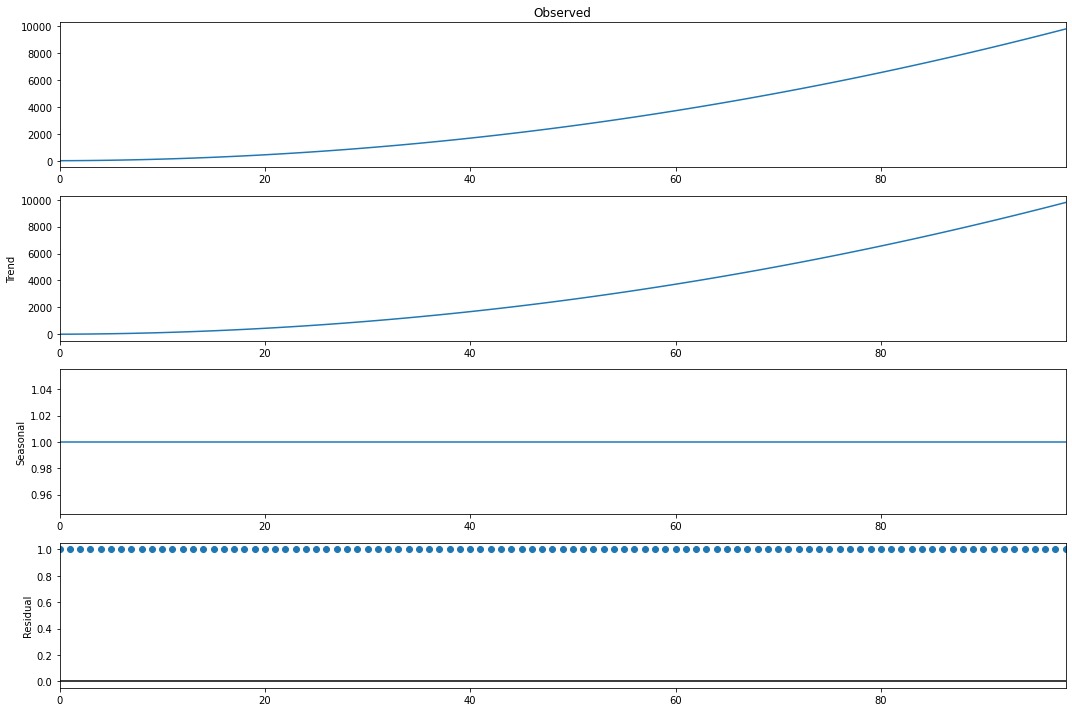

In [79]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()